# cifar 10 cnn 실습

- CCP CP CP CP F D D

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from datetime import datetime    # 수행 시간 측정을 위해.

from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils


# 1. 데이터 준비 및 전처리

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


## 1-1. 데이터 생김새 파악

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
y_train            # 다중 분류를 하려면 원 핫 인코딩을 해주어야 하기 때문에 sparse-categorical-crossentropy 사용

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## 1-2. 레이블 개수 확인하기

- 0~9 로 10개

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## 1-3. 모델 학습
- CCP CP CP CP F DDD D

- Dropout : 0.25
- learning_rate : 1e-5
- callback 함수: ReduceLROnPlateau -> 성능 개선이 없으면 학습률을 동적으로 조정

In [7]:
X_train = X_train / 255.0                   # 이미지 정규화
X_test = X_test / 255.0                     # 이미지 정규화

X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

model = Sequential()

# CCP
model.add(Conv2D(filters=32, kernel_size=3, strides=(1,1), padding="SAME", input_shape = (32, 32, 3), activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, strides=(1,1), padding="SAME", input_shape = (32, 32, 3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.25))

# CP
model.add(Conv2D(filters=64, kernel_size=3, strides=(1,1), padding="SAME", input_shape = (32, 32, 3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.25))

# CP
model.add(Conv2D(filters=128, kernel_size=3, strides=(1,1), padding="SAME", input_shape = (32, 32, 3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.25))

# CP
model.add(Conv2D(filters=128, kernel_size=3, strides=(1,1), padding="SAME", input_shape = (32, 32, 3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.25))

# FC
# 입력층
model.add(Flatten())

# 은닉층
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))

# 출력층 -> 레이블이 10개임. 즉, 10개 중 하나로 다중 분류
model.add(Dense(10, activation="softmax"))

# compile
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])


tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=.5, patience=10) #10번 동안 개선이 없으면, 학습률을 절반으로 자동 조정

result = model.fit(X_train, y_train, epochs=100, validation_split=.2, batch_size=500, callbacks=[tf_reduce])

Epoch 1/100
80/80 [==============================] - 19s 48ms/step - loss: 2.3020 - accuracy: 0.0977 - val_loss: 2.3009 - val_accuracy: 0.1020 - lr: 1.0000e-05
Epoch 2/100
80/80 [==============================] - 3s 41ms/step - loss: 2.2997 - accuracy: 0.1057 - val_loss: 2.2991 - val_accuracy: 0.1120 - lr: 1.0000e-05
Epoch 3/100
80/80 [==============================] - 3s 42ms/step - loss: 2.2966 - accuracy: 0.1078 - val_loss: 2.2957 - val_accuracy: 0.1388 - lr: 1.0000e-05
Epoch 4/100
80/80 [==============================] - 3s 39ms/step - loss: 2.2910 - accuracy: 0.1182 - val_loss: 2.2889 - val_accuracy: 0.1443 - lr: 1.0000e-05
Epoch 5/100
80/80 [==============================] - 3s 41ms/step - loss: 2.2792 - accuracy: 0.1269 - val_loss: 2.2726 - val_accuracy: 0.1594 - lr: 1.0000e-05
Epoch 6/100
80/80 [==============================] - 3s 40ms/step - loss: 2.2497 - accuracy: 0.1497 - val_loss: 2.2350 - val_accuracy: 0.1566 - lr: 1.0000e-05
Epoch 7/100
80/80 [==========================

## 1-4. 모델 결과 평가 및 시각화

In [8]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.4500 - accuracy: 0.4690


[1.449961543083191, 0.4690000116825104]

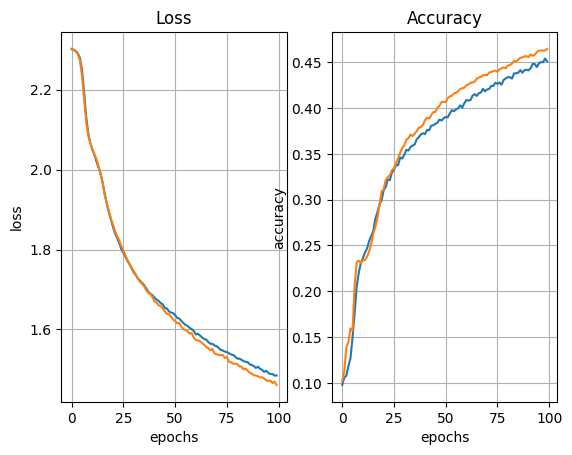

In [9]:
plt.figsize=(12,6)

# 시각화
plt.subplot(1,2,1)

plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history['loss'], label="loss")
plt.plot(result.history['val_loss'], label="val_loss")

plt.subplot(1,2,2)

plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(result.history['accuracy'], label="accuracy")
plt.plot(result.history['val_accuracy'], label="val_accuracy")

## 그래프를 본 결과, 과적합은 없으나 정확도가 낮음
-> 튜닝이 필요해 보임


# 2. 튜닝

## 2-1. 정확도를 높이기 위한 튜닝 1

- CCP CCP CP CP F DDD D 로 변경 (모델의 복잡도 증가)

- kernel_initialize = "he_normal" 초기 가중치 초기화
- 학습률: 1e-5 -> 1e-3

In [10]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.3))

# 2nd Convolution Layer
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.3))

# 3rd Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.3))

# 4th Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer = Adam(learning_rate=0.001), metrics=["accuracy"])

## ReductLROmPlateau
tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=.5, patience=10)

result = model.fit(X_train, y_train, epochs=100, validation_split=.2,  batch_size=1000, callbacks=[tf_reduce])


Epoch 1/100
40/40 [==============================] - 11s 112ms/step - loss: 2.1239 - accuracy: 0.1902 - val_loss: 1.9873 - val_accuracy: 0.2732 - lr: 0.0010
Epoch 2/100
40/40 [==============================] - 4s 103ms/step - loss: 1.8223 - accuracy: 0.3183 - val_loss: 1.6960 - val_accuracy: 0.3777 - lr: 0.0010
Epoch 3/100
40/40 [==============================] - 4s 102ms/step - loss: 1.6802 - accuracy: 0.3768 - val_loss: 1.5689 - val_accuracy: 0.4208 - lr: 0.0010
Epoch 4/100
40/40 [==============================] - 4s 103ms/step - loss: 1.5264 - accuracy: 0.4333 - val_loss: 1.4393 - val_accuracy: 0.4671 - lr: 0.0010
Epoch 5/100
40/40 [==============================] - 4s 102ms/step - loss: 1.4138 - accuracy: 0.4781 - val_loss: 1.3297 - val_accuracy: 0.5069 - lr: 0.0010
Epoch 6/100
40/40 [==============================] - 4s 104ms/step - loss: 1.3794 - accuracy: 0.4961 - val_loss: 1.2696 - val_accuracy: 0.5373 - lr: 0.0010
Epoch 7/100
40/40 [==============================] - 4s 101ms/s

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5397 - accuracy: 0.8305


[0.539667546749115, 0.8305000066757202]

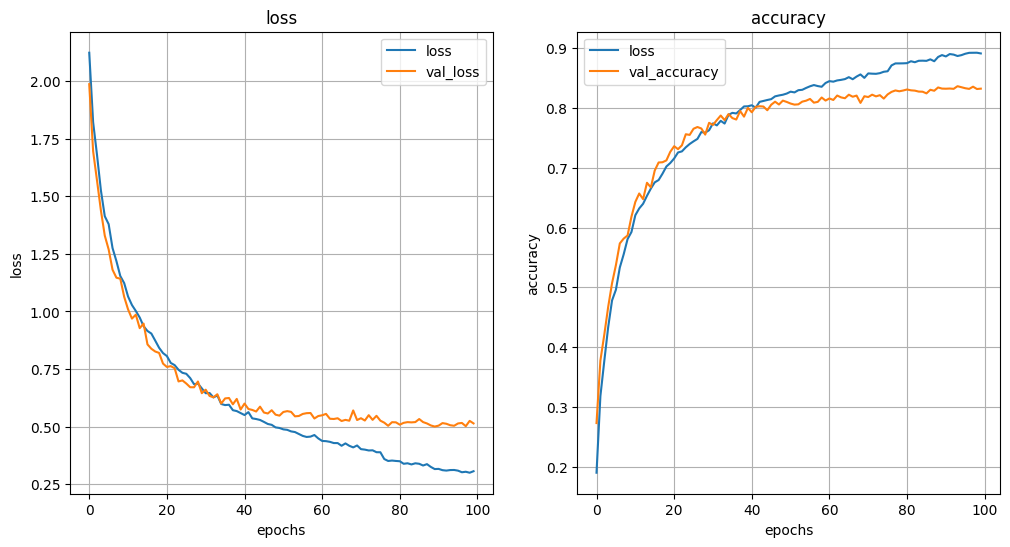

In [12]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history['loss'], label="loss")
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend(loc="best")

plt.subplot(1,2,2)

plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(result.history['accuracy'], label="loss")
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend(loc="best")

## 2-2. 과적합을 낮추기 위한 튜닝2

- 정확도가 비약적으로 상승하였으나, 과적합이 살짝 있어보임.
- dropout 비율을 0.3 -> 0.35로 조정
- validation_split을 0.2 -> 0.3으로 조정
- learning rate를 1e-3 -> 1e-4로 조정

In [13]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 2nd Convolution Layer
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 3rd Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 4th Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer = Adam(learning_rate=1e-4), metrics=["accuracy"])

## ReductLROmPlateau
tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=.5, patience=10)

result = model.fit(X_train, y_train, epochs=100, validation_split=.3,  batch_size=1000, callbacks=[tf_reduce])

Epoch 1/100
35/35 [==============================] - 8s 123ms/step - loss: 2.2993 - accuracy: 0.1012 - val_loss: 2.2948 - val_accuracy: 0.1099 - lr: 1.0000e-04
Epoch 2/100
35/35 [==============================] - 4s 105ms/step - loss: 2.2348 - accuracy: 0.1329 - val_loss: 2.1209 - val_accuracy: 0.2070 - lr: 1.0000e-04
Epoch 3/100
35/35 [==============================] - 4s 105ms/step - loss: 2.0559 - accuracy: 0.2275 - val_loss: 2.0381 - val_accuracy: 0.2323 - lr: 1.0000e-04
Epoch 4/100
35/35 [==============================] - 4s 105ms/step - loss: 2.0095 - accuracy: 0.2485 - val_loss: 2.0051 - val_accuracy: 0.2663 - lr: 1.0000e-04
Epoch 5/100
35/35 [==============================] - 4s 106ms/step - loss: 1.9711 - accuracy: 0.2682 - val_loss: 1.9716 - val_accuracy: 0.2748 - lr: 1.0000e-04
Epoch 6/100
35/35 [==============================] - 4s 107ms/step - loss: 1.9337 - accuracy: 0.2813 - val_loss: 1.9629 - val_accuracy: 0.2762 - lr: 1.0000e-04
Epoch 7/100
35/35 [=====================

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9823 - accuracy: 0.6493


[0.9823215007781982, 0.6492999792098999]

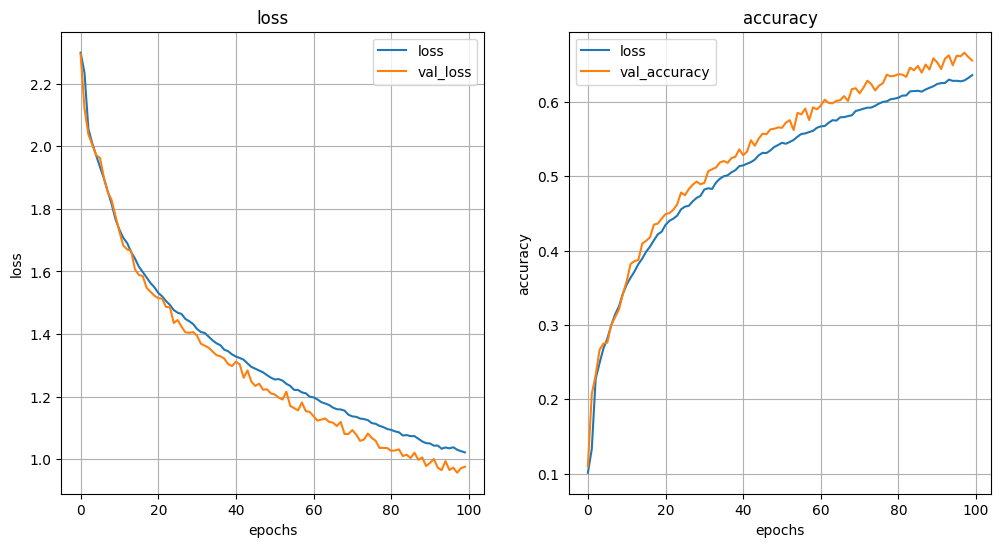

In [15]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history['loss'], label="loss")
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend(loc="best")

plt.subplot(1,2,2)

plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(result.history['accuracy'], label="loss")
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend(loc="best")

## 2-3. 정확도를 높이기 위한 튜닝3

- 과적합이 확연히 좋아졌지만, 정확도가 낮아졌음.

- validation_split을 0.3 -> 0.25로 조정

- 그래프의 꼬리 부분을 보면 성능이 계속해서 좋아질 가능성이 있어 보임. epochs을 100 -> 150 으로 조정

In [16]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 2nd Convolution Layer
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 3rd Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 4th Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer = Adam(learning_rate=1e-4), metrics=["accuracy"])

## ReductLROmPlateau
tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=.5, patience=10)

result = model.fit(X_train, y_train, epochs=150, validation_split=.25,  batch_size=1000, callbacks=[tf_reduce])

Epoch 1/150
38/38 [==============================] - 8s 126ms/step - loss: 2.3005 - accuracy: 0.1068 - val_loss: 2.2959 - val_accuracy: 0.1286 - lr: 1.0000e-04
Epoch 2/150
38/38 [==============================] - 4s 105ms/step - loss: 2.2019 - accuracy: 0.1574 - val_loss: 2.1042 - val_accuracy: 0.1804 - lr: 1.0000e-04
Epoch 3/150
38/38 [==============================] - 4s 102ms/step - loss: 2.0584 - accuracy: 0.2099 - val_loss: 2.0426 - val_accuracy: 0.2193 - lr: 1.0000e-04
Epoch 4/150
38/38 [==============================] - 4s 103ms/step - loss: 1.9859 - accuracy: 0.2464 - val_loss: 1.9680 - val_accuracy: 0.2567 - lr: 1.0000e-04
Epoch 5/150
38/38 [==============================] - 4s 119ms/step - loss: 1.9183 - accuracy: 0.2700 - val_loss: 1.9132 - val_accuracy: 0.2835 - lr: 1.0000e-04
Epoch 6/150
38/38 [==============================] - 4s 105ms/step - loss: 1.8684 - accuracy: 0.2945 - val_loss: 1.8570 - val_accuracy: 0.3170 - lr: 1.0000e-04
Epoch 7/150
38/38 [=====================

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.7910 - accuracy: 0.7210


[0.7909965515136719, 0.7210000157356262]

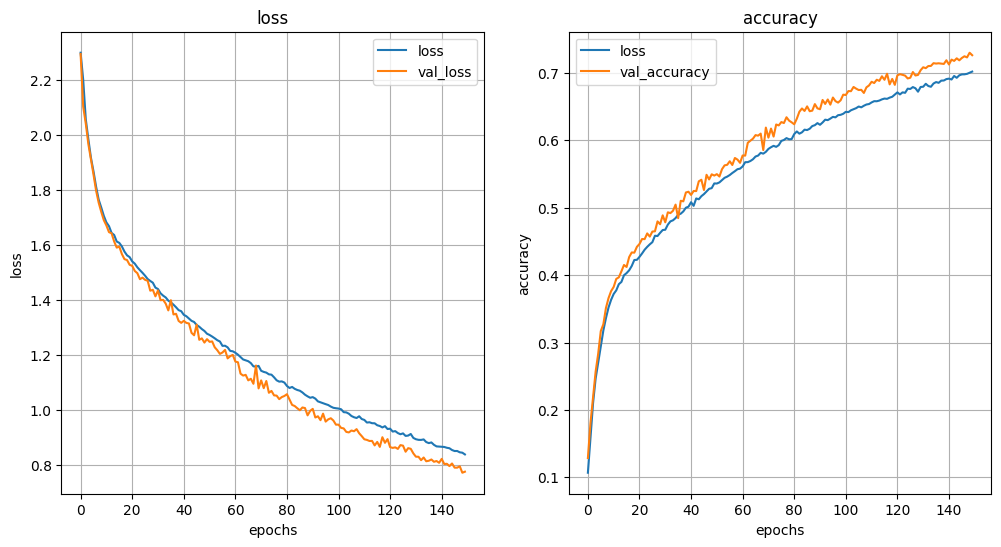

In [18]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history['loss'], label="loss")
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend(loc="best")

plt.subplot(1,2,2)

plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(result.history['accuracy'], label="loss")
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend(loc="best")

## 2-4. 정확도를 높이기 위한 튜닝 4

- epochs을 150으로 늘렸더니 과적합은 좋게 유지되었고, 정확도도 올랐음
- 그래프를 그려보았을 때도 정확도가 꾸준히 상승했음.
- 학습률은 1e-3에서 가장 좋은 성능을 보이는 듯하여 학습률만 1e-4 -> 1e-3으로 조정

In [19]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 2nd Convolution Layer
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 3rd Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

# 4th Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer = Adam(learning_rate=1e-3), metrics=["accuracy"])

## ReductLROmPlateau
tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=.5, patience=10) # stop대신 넣음. 14-15 등등 변화 적으니 러닝레이트 절반.

result = model.fit(X_train, y_train, epochs=150, validation_split=.25,  batch_size=1000, callbacks=[tf_reduce])

Epoch 1/150
38/38 [==============================] - 8s 125ms/step - loss: 2.1610 - accuracy: 0.1692 - val_loss: 2.0077 - val_accuracy: 0.2441 - lr: 0.0010
Epoch 2/150
38/38 [==============================] - 4s 100ms/step - loss: 1.9206 - accuracy: 0.2836 - val_loss: 1.9157 - val_accuracy: 0.3021 - lr: 0.0010
Epoch 3/150
38/38 [==============================] - 4s 99ms/step - loss: 1.7349 - accuracy: 0.3535 - val_loss: 1.7157 - val_accuracy: 0.3728 - lr: 0.0010
Epoch 4/150
38/38 [==============================] - 4s 100ms/step - loss: 1.6198 - accuracy: 0.3961 - val_loss: 1.5383 - val_accuracy: 0.4376 - lr: 0.0010
Epoch 5/150
38/38 [==============================] - 4s 102ms/step - loss: 1.5180 - accuracy: 0.4380 - val_loss: 1.5099 - val_accuracy: 0.4424 - lr: 0.0010
Epoch 6/150
38/38 [==============================] - 4s 101ms/step - loss: 1.4446 - accuracy: 0.4642 - val_loss: 1.3726 - val_accuracy: 0.4904 - lr: 0.0010
Epoch 7/150
38/38 [==============================] - 4s 101ms/ste

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5112 - accuracy: 0.8340


[0.5112277269363403, 0.8339999914169312]

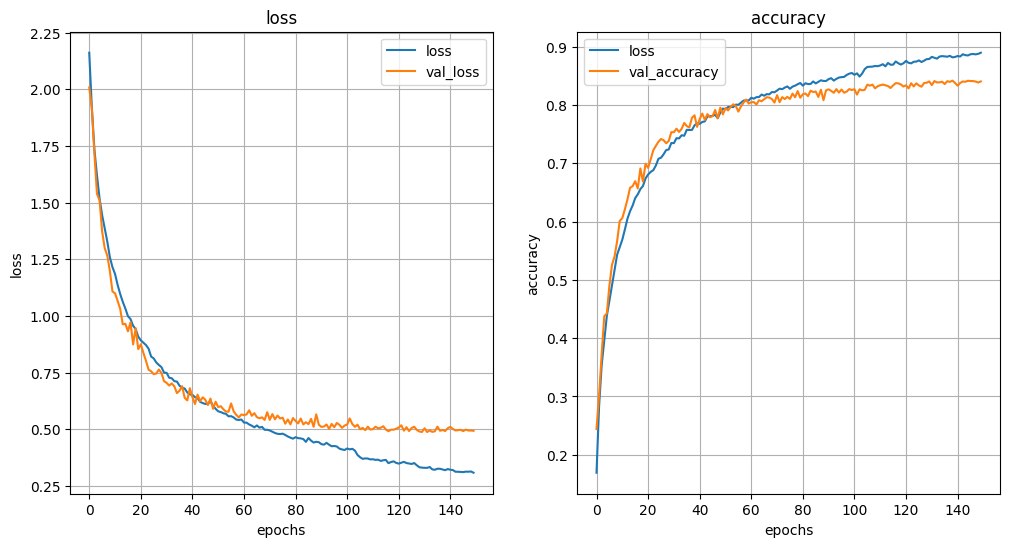

In [21]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history['loss'], label="loss")
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend(loc="best")

plt.subplot(1,2,2)

plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(result.history['accuracy'], label="loss")
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend(loc="best")

## 2-5. 마지막 튜닝

- 정확도는 0.83으로 오른 상태지만 여전히 과적합이 아쉽다.

- 이에 Dropout 비율을 0.35 -> 0.4 로 높인다.

In [22]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.4))

# 2nd Convolution Layer
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.4))

# 3rd Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.4))

# 4th Convolution Layer
model.add(Conv2D(filters=128, kernel_size=3, padding="SAME", input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer = Adam(learning_rate=1e-3

                                                                       ), metrics=["accuracy"])

## ReductLROmPlateau
tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=.5, patience=10) # stop대신 넣음. 14-15 등등 변화 적으니 러닝레이트 절반.

result = model.fit(X_train, y_train, epochs=150, validation_split=.25,  batch_size=1000, callbacks=[tf_reduce])

Epoch 1/150
38/38 [==============================] - 8s 120ms/step - loss: 2.1916 - accuracy: 0.1711 - val_loss: 2.1125 - val_accuracy: 0.2134 - lr: 0.0010
Epoch 2/150
38/38 [==============================] - 4s 103ms/step - loss: 1.9379 - accuracy: 0.2706 - val_loss: 1.8696 - val_accuracy: 0.2982 - lr: 0.0010
Epoch 3/150
38/38 [==============================] - 4s 101ms/step - loss: 1.7846 - accuracy: 0.3247 - val_loss: 1.6857 - val_accuracy: 0.3710 - lr: 0.0010
Epoch 4/150
38/38 [==============================] - 4s 102ms/step - loss: 1.6519 - accuracy: 0.3769 - val_loss: 1.5469 - val_accuracy: 0.4210 - lr: 0.0010
Epoch 5/150
38/38 [==============================] - 4s 105ms/step - loss: 1.5449 - accuracy: 0.4233 - val_loss: 1.4418 - val_accuracy: 0.4704 - lr: 0.0010
Epoch 6/150
38/38 [==============================] - 4s 102ms/step - loss: 1.4676 - accuracy: 0.4550 - val_loss: 1.4297 - val_accuracy: 0.4704 - lr: 0.0010
Epoch 7/150
38/38 [==============================] - 4s 102ms/st

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4965 - accuracy: 0.8320


[0.49645382165908813, 0.8320000171661377]

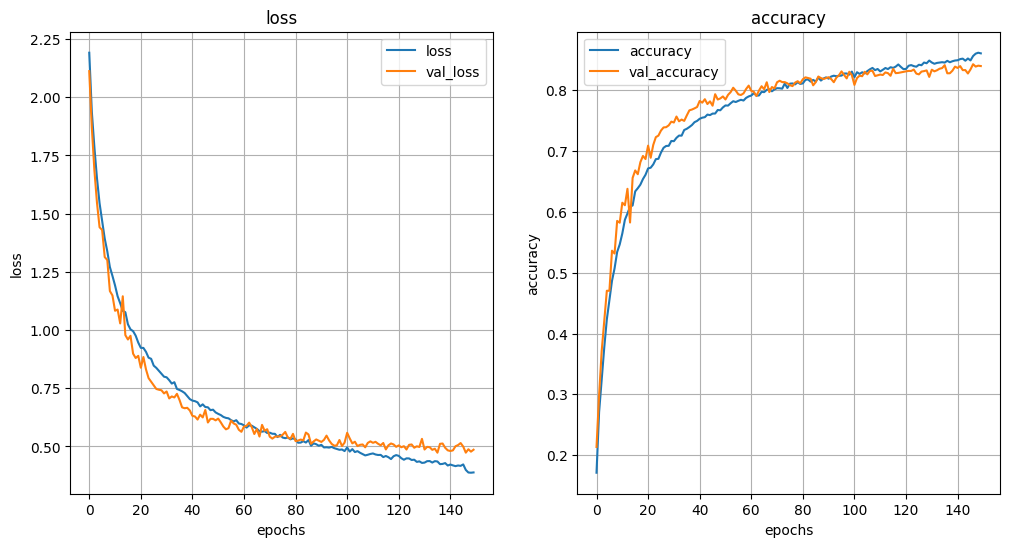

In [24]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history['loss'], label="loss")
plt.plot(result.history['val_loss'], label="val_loss")
plt.legend(loc="best")

plt.subplot(1,2,2)

plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(result.history['accuracy'], label="accuracy")
plt.plot(result.history['val_accuracy'], label="val_accuracy")
plt.legend(loc="best")

### 튜닝 결과

- 과적합과 정확도 모두 개선된 모습

# 3. 오답노트

- pred_comp_val = np.equal(pred_val, y_test)를 사용하여 두 배열 pred_val과 y_test를 비교하면, 예측값과 실제 값이 일치하는지에 대한 불리언 배열이 반환됨.

- 하지만, 두 배열의 차원이 다르기 때문에 원하는 결과가 안나옴.

- y_test의 차원은 2차원이기 때문에 이를 1차원으로 맞춰줘야 함.

In [25]:
y_test.shape

(10000, 1)

In [26]:
y_test_reshaped = y_test.reshape(-1)

In [27]:
ret_val = model.predict(X_test)

ret_val.shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [28]:
pred_val = np.argmax(ret_val, axis=1)
pred_val

array([5, 8, 8, ..., 5, 1, 7])

In [29]:
pred_comp_val = np.equal(pred_val, y_test_reshaped)
pred_comp_val

array([False,  True,  True, ...,  True,  True,  True])

In [30]:
index_label_pred_list = [[idx, y_test[idx], pred_val[idx]] for idx, result in enumerate(pred_comp_val) if result == False]

In [31]:
len(index_label_pred_list)

1680

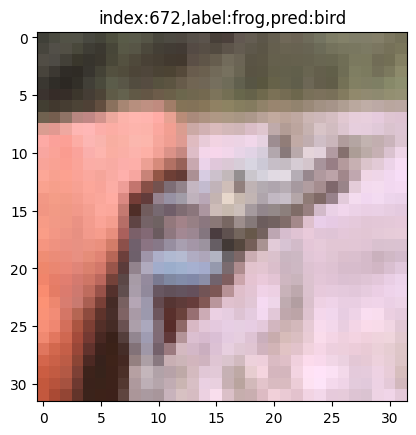

In [34]:
false_data_index = np.random.randint(len(index_label_pred_list))    # 랜덤으로 오답노트 안에 하나의 원소를 뽑아오기

cifar10_index = index_label_pred_list[false_data_index][0]    # 인덱스
label = index_label_pred_list[false_data_index][1][0]          # 정답
pred = index_label_pred_list[false_data_index][2]           # 예측

label_list = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
pred_list = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

img = X_test[cifar10_index]

title = "index:" + str(cifar10_index) + "," + "label:" + label_list[label] + "," + "pred:" + pred_list[pred]         # 0인데 6이라고 잘못 예측한 것.
plt.title(title)
plt.imshow(img)   # 컬러 이미지(3개의 채널: RGB)인 경우에는 cmap 매개변수를 사용하지 않음.

# 개구리를 새로 잘못 예측한 사진

# 4. 예측

- cifar10의 데이터를 살펴보면 label은 다음과 같음
  ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
---
- 이에 인터넷에서 새로운 사진을 다운받고 예측
---
- 알집으로 압축한 후,
  - 1. gdrive에 올려서 코랩과 mount해주기
  - 2. 알집파일의 용량이 작다면 드래그를 통해 간단히업로드해주기

In [35]:
import cv2
import zipfile
import os
import shutil
import glob

## 4-1 새로운 이미지 준비 및 전처리

In [36]:
with zipfile.ZipFile("/content/photo.zip", "r") as target_file:  # as 뒤에는 원하는 변수명 적어주면 됨.
  target_file.extractall("/content/photo")                   # content/photo 폴더에 압축풀기
  print("success")

success


(-0.5, 224.5, 223.5, -0.5)

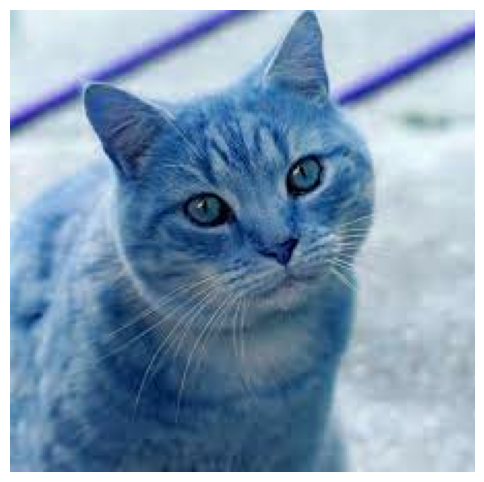

In [42]:
src_img1 = cv2.imread("/content/photo/cat_1.jpg", cv2.IMREAD_COLOR)  # cv2.IMREAD_COLOR 옵션은 이미지를 컬러 이미지로 로드하도록 지정하는 인자

plt.figure(figsize=(8,6))

plt.imshow(src_img1)
plt.axis("off")             # 이미지의 색상이 RGB기준이 아닌 BGR의 모습으로 되어 있음.

(-0.5, 224.5, 223.5, -0.5)

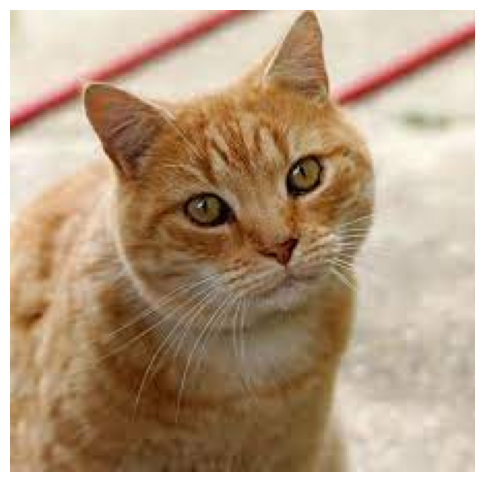

In [38]:
# cv2.cvtColor 은 OpenCV에서 이미지의 컬러 스페이스를 변환하는 함수
# OpenCV는 기본적으로 BGR 컬러 순서를 사용하기 때문에, cv2.COLOR_BGR2RGB 를 통해 BGR을 RGB로 바꿔주는 과정이 필요
dst_img1 = cv2.cvtColor(src_img1, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))

plt.imshow(dst_img1)
plt.axis("off")             # 이미지의 색상이 정상적으로 나오는 것을 알 수 있음.

<ipython-input-43-ab7ee9047452>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, i+1)


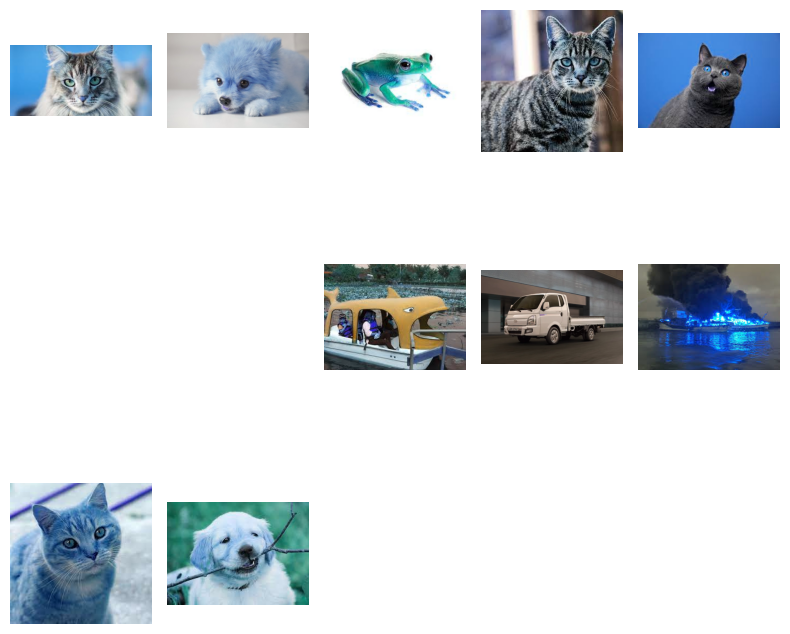

In [43]:
plt.figure(figsize=(8,8))

for i in range(len(src_img_list)):
    plt.subplot(3, 5, i+1)
    plt.imshow(src_img_list[i])
    plt.axis("off")
    plt.tight_layout()

In [59]:
src_img_list = []
dst_img_list = []

img_file_list = glob.glob("/content/photo/*")
img_file_label = []

for i in img_file_list:
  img_file_label.append(i.split("/")[-1].split(".")[0].split("_")[0])
  src_img = cv2.imread(i, cv2.IMREAD_COLOR)               # 이미지를 컬러 이미지로 불러들임
  dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)      # BGR 을 RGB 로 바꿔줌.
  dst_img = cv2.resize(dst_img, dsize=(32, 32))           # 이미지 사이즈를 32, 32로 재조정
  dst_img = dst_img / 255.0                               # 이미지 정규화

  print(src_img.shape, dst_img.shape)

  src_img_list.append(src_img)
  dst_img_list.append(dst_img)

(159, 316, 3) (32, 32, 3)
(426, 640, 3) (32, 32, 3)
(183, 275, 3) (32, 32, 3)
(225, 225, 3) (32, 32, 3)
(183, 275, 3) (32, 32, 3)
(224, 225, 3) (32, 32, 3)
(185, 272, 3) (32, 32, 3)
(194, 259, 3) (32, 32, 3)
(666, 1000, 3) (32, 32, 3)
(194, 259, 3) (32, 32, 3)
(224, 225, 3) (32, 32, 3)
(191, 264, 3) (32, 32, 3)


<ipython-input-41-5439f87a5175>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, i+1)


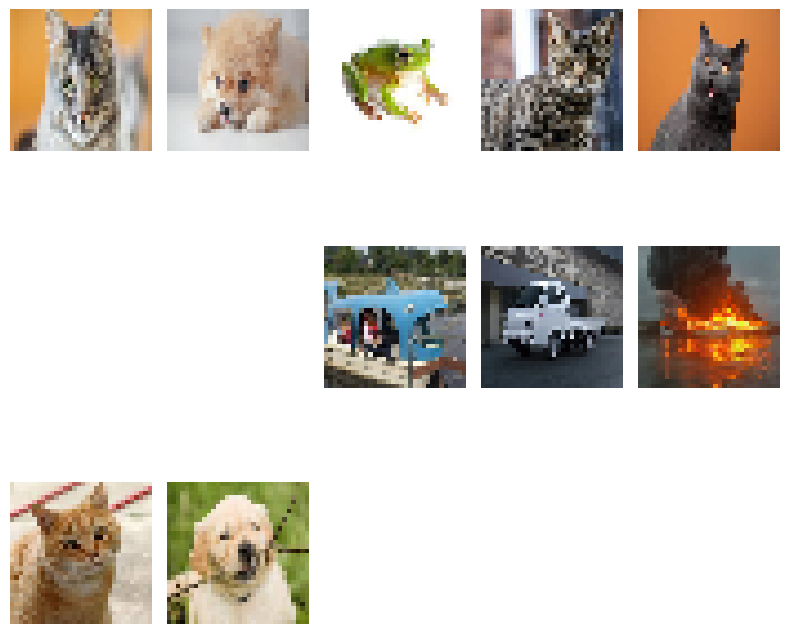

In [41]:
plt.figure(figsize=(8,8))

for i in range(len(dst_img_list)):
    plt.subplot(3, 5, i+1)
    plt.imshow(dst_img_list[i])
    plt.axis("off")
    plt.tight_layout()

In [45]:
dst_img_array = np.array(dst_img_list)  # 사진 예측을 위해 리스트를 배열로 변환
dst_img_array.shape

(12, 32, 32, 3)

## 4-2. 새로운 이미지 예측

In [46]:
pred = model.predict(dst_img_array)
pred

1/1 [==============================] - 0s 256ms/step


array([[5.32613467e-06, 4.25886647e-05, 5.53495891e-04, 7.79136837e-01,
        6.98406424e-04, 2.16087520e-01, 5.25872456e-04, 2.80761812e-03,
        4.11504079e-05, 1.01155158e-04],
       [2.83923291e-05, 1.00157550e-03, 1.80254970e-03, 7.56855249e-01,
        1.89229310e-03, 1.34336233e-01, 9.93515775e-02, 7.20670563e-04,
        1.38889911e-04, 3.87249724e-03],
       [2.19675985e-05, 1.47681712e-04, 2.72825593e-04, 2.95774844e-02,
        9.01515305e-05, 2.04706928e-04, 9.69379842e-01, 1.51967083e-06,
        2.52622158e-06, 3.01224442e-04],
       [5.00884539e-07, 3.60538735e-07, 1.41311437e-02, 2.31513843e-01,
        1.56305544e-03, 3.50512164e-05, 7.52736330e-01, 1.27054418e-05,
        1.78054677e-06, 5.20015419e-06],
       [6.96711475e-03, 4.04739330e-05, 2.00898759e-03, 3.76531839e-01,
        7.91233324e-04, 4.19772893e-01, 2.52377766e-04, 1.93106487e-01,
        1.99536851e-04, 3.28991155e-04],
       [9.16558292e-07, 1.21311973e-06, 2.44986266e-03, 2.10408121e-01,
   

In [47]:
pred.shape

(12, 10)

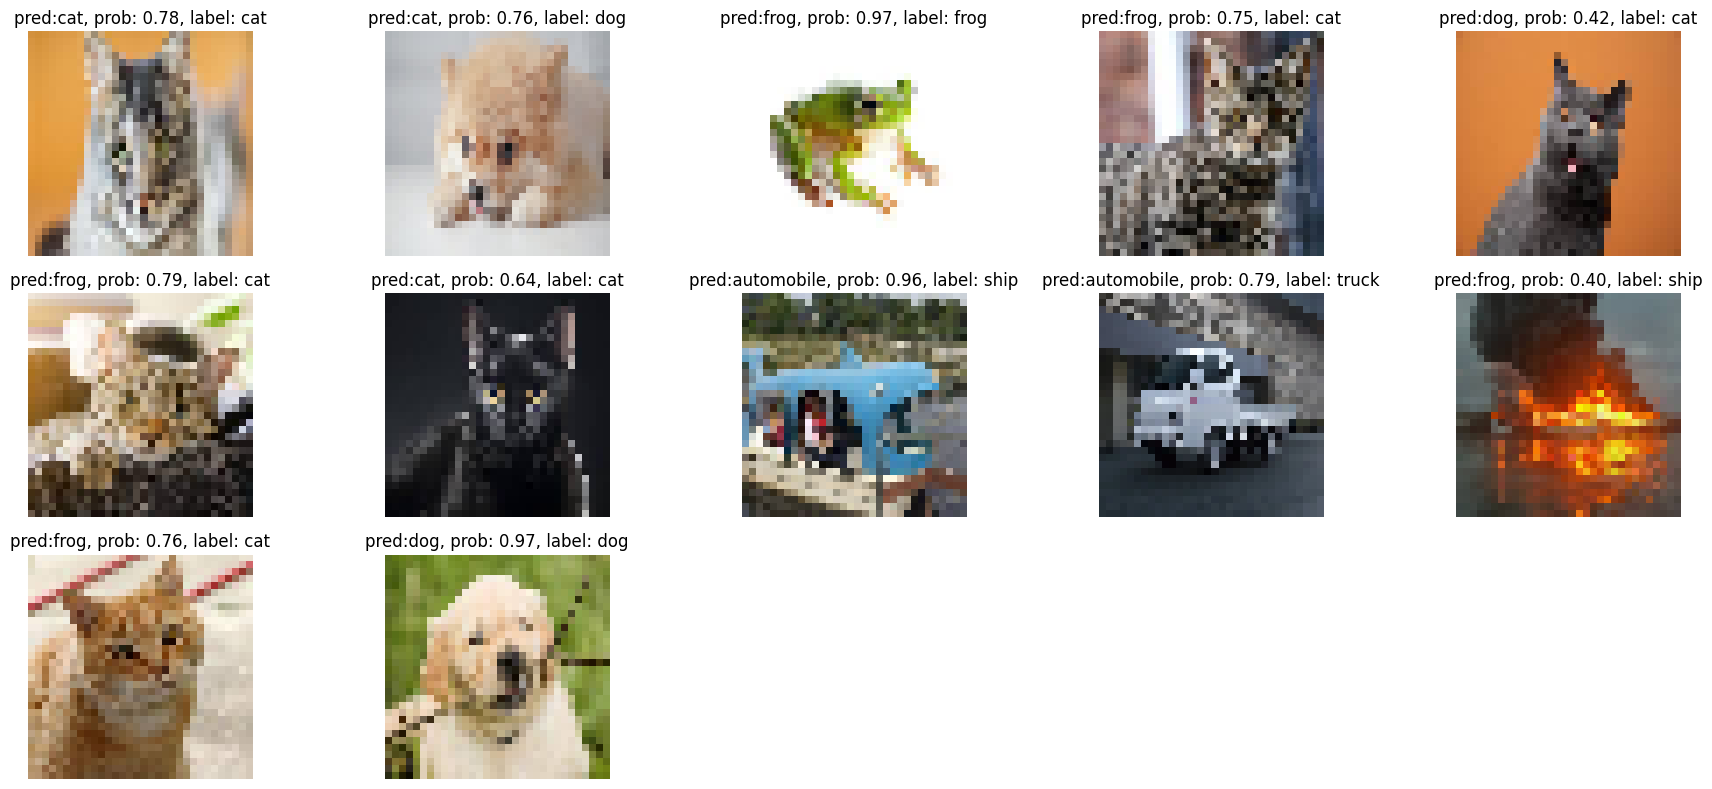

In [79]:
class_name = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(18,8))

for i in range(len(pred)):
    class_idx = np.argmax(pred[i])                 # 10개 중, 가장 높은 확률을 가진 원소의 위치를 기억
    plt.subplot(3, 5, i+1)
    plt.imshow(dst_img_list[i])
    plt.axis("off")
    title = "pred:{}, prob: {:.2f}, label: {}".format(class_name[class_idx], pred[i].max(), img_file_label[i])
    plt.title(title)    # pred[i].max를 통해 가장 높은 값을 반환. )
    plt.tight_layout()


## 4-3. 상위 3개의 예측값도 살펴보기

In [65]:
top3 = 3

for i in range(len(pred)):
    sorted_index = pred[i].argsort()

    # 내림차순으로 다시 변경
    sorted_index = sorted_index[::-1]

    print("===========================")

    print(sorted_index, ", 입력 값의 label=", img_file_label[i])    # 앞에서부터 3개가 높은 값의 인덱스임.

    for j in range(top3):
        pred_val = pred[i, sorted_index[j]]
        class_idx = sorted_index[j]
        print("예측값 :", class_name[class_idx], pred_val)

[3 5 7 4 2 6 9 1 8 0] , 입력 값의 label= cat
예측값 : cat 0.77913684
예측값 : dog 0.21608752
예측값 : horse 0.0028076181
[3 5 6 9 4 2 1 7 8 0] , 입력 값의 label= dog
예측값 : cat 0.75685525
예측값 : dog 0.13433623
예측값 : frog 0.09935158
[6 3 9 2 5 1 4 0 8 7] , 입력 값의 label= frog
예측값 : frog 0.96937984
예측값 : cat 0.029577484
예측값 : truck 0.00030122444
[6 3 2 4 5 7 9 8 0 1] , 입력 값의 label= cat
예측값 : frog 0.75273633
예측값 : cat 0.23151384
예측값 : bird 0.014131144
[5 3 7 0 2 4 9 6 8 1] , 입력 값의 label= cat
예측값 : dog 0.4197729
예측값 : cat 0.37653184
예측값 : horse 0.19310649
[6 3 2 4 5 7 9 1 0 8] , 입력 값의 label= cat
예측값 : frog 0.7861609
예측값 : cat 0.21040812
예측값 : bird 0.0024498627
[3 4 5 6 7 0 2 8 9 1] , 입력 값의 label= cat
예측값 : cat 0.6400564
예측값 : deer 0.15320987
예측값 : dog 0.1408556
[1 9 0 8 6 2 7 5 4 3] , 입력 값의 label= ship
예측값 : automobile 0.95887995
예측값 : truck 0.018881997
예측값 : airplane 0.012005947
[1 9 0 8 6 2 3 5 4 7] , 입력 값의 label= truck
예측값 : automobile 0.7902748
예측값 : truck 0.20971934
예측값 : airplane 2.9416442e-06
[6 0 8 2 4